In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [12]:

import random

In [13]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [14]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.606156,1.782932,0.613276,-1.881923,-0.585054,1
1,-3.916742,-1.202555,2.204823,0.106387,-1.943606,0
2,-0.705907,-0.777294,-2.449183,-0.152398,-2.256862,0
3,-0.813661,1.135546,2.409303,-0.393213,0.075017,1
4,-0.166046,-0.608571,0.000269,0.815333,-2.516949,0


In [15]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [16]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [17]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [18]:
df1 = combined_sampling(df,0.5,0.5)

<ipython-input-16-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [19]:
df2 = combined_sampling(df,0.5,0.5)

<ipython-input-16-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [20]:
df3 = combined_sampling(df,0.5,0.5)

<ipython-input-16-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [21]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col3', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')
Index(['col4', 'col1', 'target'], dtype='object')


In [22]:
df3

,col4,col1,target
37,1.703636,-3.257506,1
96,-0.520040,-1.760715,0
46,-0.720696,0.847348,0
53,-3.040786,0.536781,0
54,1.191391,-2.317710,0
48,0.779532,0.225004,1
90,1.742464,-4.182790,1
6,-2.358807,2.595308,1
69,-2.212070,-0.967835,0
80,-1.457783,-0.413387,0


In [23]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [24]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [25]:
from sklearn.tree import plot_tree

[Text(0.6607142857142857, 0.9375, 'x[1] <= 1.894\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.4642857142857143, 0.8125, 'x[1] <= -0.772\ngini = 0.491\nsamples = 37\nvalue = [21, 16]'),
 Text(0.2857142857142857, 0.6875, 'x[0] <= -1.078\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.21428571428571427, 0.5625, 'x[1] <= -2.599\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.14285714285714285, 0.4375, 'x[1] <= -3.394\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07142857142857142, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21428571428571427, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2857142857142857, 0.4375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.35714285714285715, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6428571428571429, 0.6875, 'x[0] <= -1.186\ngini = 0.436\nsamples = 28\nvalue = [19, 9]'),
 Text(0.5, 0.5625, 'x[1] <= -0.499\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.42857142857

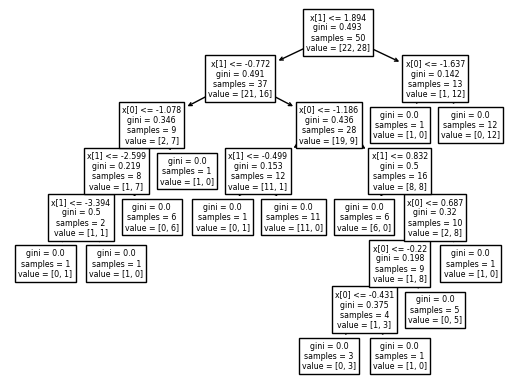

In [26]:
plot_tree(clf1)

[Text(0.5, 0.9, 'x[0] <= -0.015\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.2, 0.7, 'x[0] <= -0.539\ngini = 0.083\nsamples = 23\nvalue = [22, 1]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.3, 0.5, 'x[0] <= -0.198\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.7, 'x[1] <= 3.244\ngini = 0.137\nsamples = 27\nvalue = [2, 25]'),
 Text(0.7, 0.5, 'x[0] <= 0.241\ngini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.6, 0.3, 'x[0] <= 0.123\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

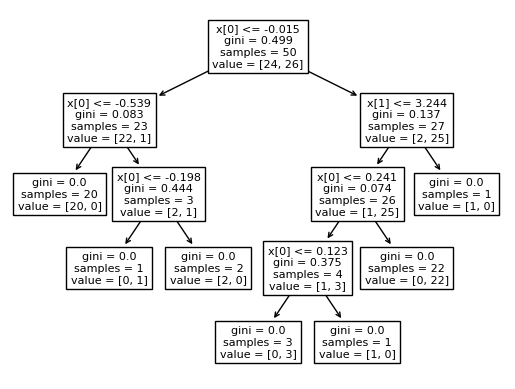

In [27]:
plot_tree(clf2)

[Text(0.5555555555555556, 0.9444444444444444, 'x[0] <= -0.234\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.3888888888888889, 0.8333333333333334, 'x[0] <= -0.816\ngini = 0.48\nsamples = 35\nvalue = [21, 14]'),
 Text(0.3333333333333333, 0.7222222222222222, 'x[1] <= -1.53\ngini = 0.497\nsamples = 26\nvalue = [12, 14]'),
 Text(0.2777777777777778, 0.6111111111111112, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3888888888888889, 0.6111111111111112, 'x[0] <= -1.291\ngini = 0.499\nsamples = 23\nvalue = [12, 11]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= -2.347\ngini = 0.49\nsamples = 21\nvalue = [12, 9]'),
 Text(0.2222222222222222, 0.3888888888888889, 'x[0] <= -2.409\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.16666666666666666, 0.2777777777777778, 'x[1] <= 0.505\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.1111111111111111, 0.16666666666666666, 'x[0] <= -2.661\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.05555555555555555, 0.05555555555555555, 'g

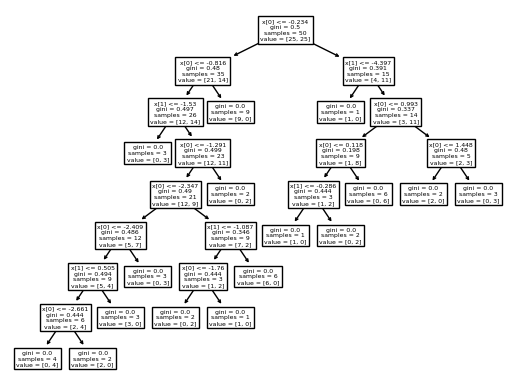

In [28]:
plot_tree(clf3)

In [29]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [30]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [31]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [32]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
10,-1.928475,1.591734,1.574429,-1.218334,-0.200430,1
5,-0.773032,-0.224728,3.121428,-2.242203,0.984908,1
28,0.177743,-1.272137,-2.023324,-2.005755,-0.351644,0
48,0.225004,0.601638,-1.776259,0.779532,-4.293701,1
8,-2.117243,0.810502,2.214218,0.289260,-0.030425,1
37,-3.257506,1.496864,3.007952,1.703636,-0.322505,1
74,-2.707455,3.137687,1.530153,2.468623,-1.810989,1
72,-2.754245,3.205745,0.081384,0.674009,-1.993127,1
90,-4.182790,1.689809,2.403348,1.742464,-1.024095,1
83,-0.094976,0.954923,-0.632954,-1.414648,-1.886007,1
